# USING APMS AUTISM DATA TO PREDICT THE PREVALENCE OF ASD IN THE UK 

It is challenging to forecast a person`s likelihood of having ASD because there are currently no medical tests that can identify all of the characteristics of the illness. Autism data helps to manage the prevalence of disease in the children and helps the guardian to adopt to manage it using modern tools and technologies.This code will be separated into two sections; the data analytical section and the machine learning section.

#### IMPORTING LIBRARY 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the dataset
data = pd.read_csv("C:/Users/Hp/Documents/Toddler Autism dataset July 2018.csv")

In [3]:
# looks at the dataset
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


#### DATA DESCRIPTION

A1-A10: Items within Q-Chat-10 in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10, if the respose was Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.
The remaining features in the datasets are collected from the “submit” screen in the ASDTests screening app. It should be noted that the class varaible was assigned automatically based on the score obtained by the user while undergoing the screening process using the ASDTests app. The questions are listed below:

- A1 Does your child look at you when you call his/her name?
- A2 How easy is it for you to get eye contact with your child?
- A3 Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)
- A4 Does your child point to share interest with you? (e.g. pointing at an interesting sight)
- A5 Does your child pretend? (e.g. care for dolls, talk on a toy phone)
- A6 Does your child follow where you’re looking?
- A7 If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)
- A8 Would you describe your child’s first words as:
- A9 Does your child use simple gestures? (e.g. wave goodbye)
- A10 Does your child stare at nothing with no apparent purpose?

In [4]:
# renames the selected columns on the dataframe
data = data.rename(columns = {"Age_Mons": "Age Months", "Class/ASD Traits ": "ASD Traits"})

#### REPLACING THE WORD "BLACK" TO "AFRICAN" IN THE DATAFRAME

In [5]:
# replace the column with african
data["Ethnicity"] = data["Ethnicity"].replace("black", "African")

### EXPLORATORY DATA ANALYSIS

In [6]:
# looks at the data dimension
data.shape

(1054, 19)

In [7]:
# looks at the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age Months              1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [8]:
# checks the sum of the total features in the ethnicity column
data["Ethnicity"].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
African            53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [9]:
# checks for the unique values in the specified column
data["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [10]:
# checks for the unique values in the specified column
data["Who completed the test"].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [11]:
# checks for the unique values in the specified column
data["ASD Traits"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# looks at the statistical feaures of the dataset
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### CORRELATION HEATMAP

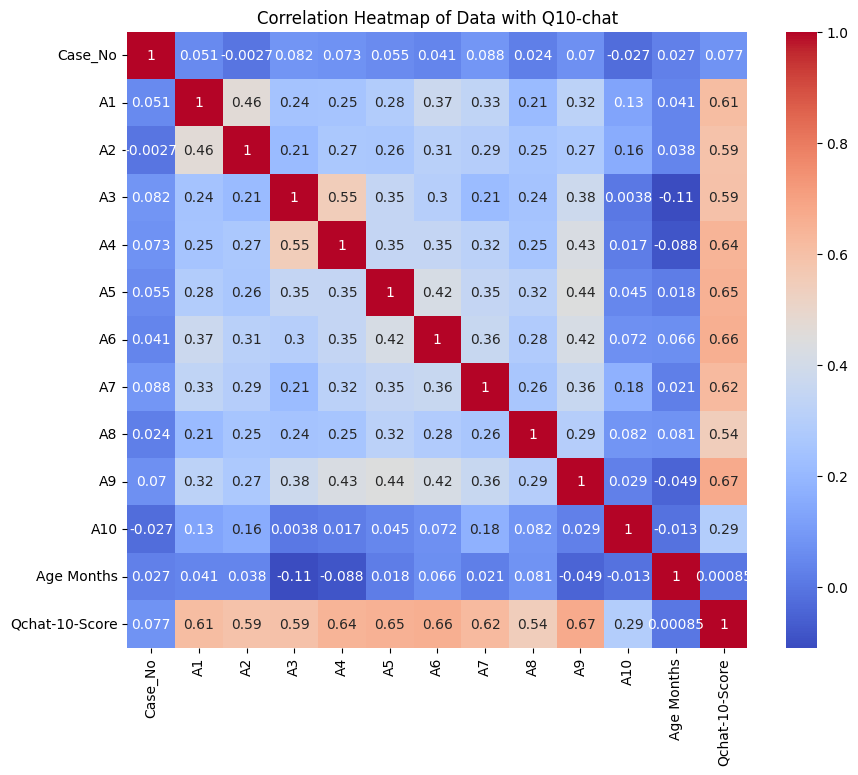

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Data with Q10-chat")
plt.show()

#### INSIGHT FROM THE CORRELATION MATRIX

The correlation matrix is a table which shows the correlation coefficients between variables where each cell in the table represents the correlation between two variables. The coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation and 0 indicates no correlation. From the data above, the following can be deduced from the correlation matrix:
- The Qchat 10 score correlates more with the A1, A2, A3, A4, A5, A6, A7, A8 and A9. The A10 has low correlation to the Qchat 10 score.
- The A4 and A3 has the highest correlation posotively amongst the Answers given, followed by A2 and A1.
- The answer with the least correlation amongst the answers is the A10.
- The Age does not really play a significant role in the prediction of the ASD class traits with very little correlation.

#### WHAT FEATURES FROM A1 TO A10 CONTRIBUTES THE MOST IN ASD TRAITS?

In [14]:
# selects the columns in the dataset 
data.iloc[:, 1:11].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1
1,1,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1


[Text(0, 0, '423'),
 Text(0, 0, '473'),
 Text(0, 0, '484'),
 Text(0, 0, '516'),
 Text(0, 0, '540'),
 Text(0, 0, '553'),
 Text(0, 0, '594'),
 Text(0, 0, '608'),
 Text(0, 0, '618'),
 Text(0, 0, '685')]

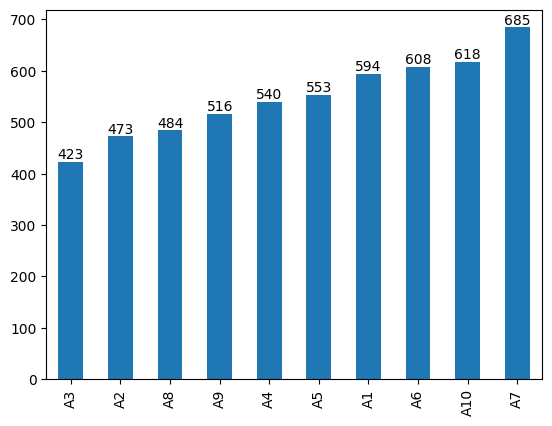

In [15]:
# plots the countplot for the value counts of the q1- 10
ax = data.iloc[:, 1:11].sum().sort_values().plot(kind = "bar")
ax.bar_label(ax.containers[0])

From the data visualization above, the majority of toddlers cared for their parents when they has poor vision. on the other hand, there were only 423 toddlers who showed an indication of craving for a toy or something.

### COUNTPLOT

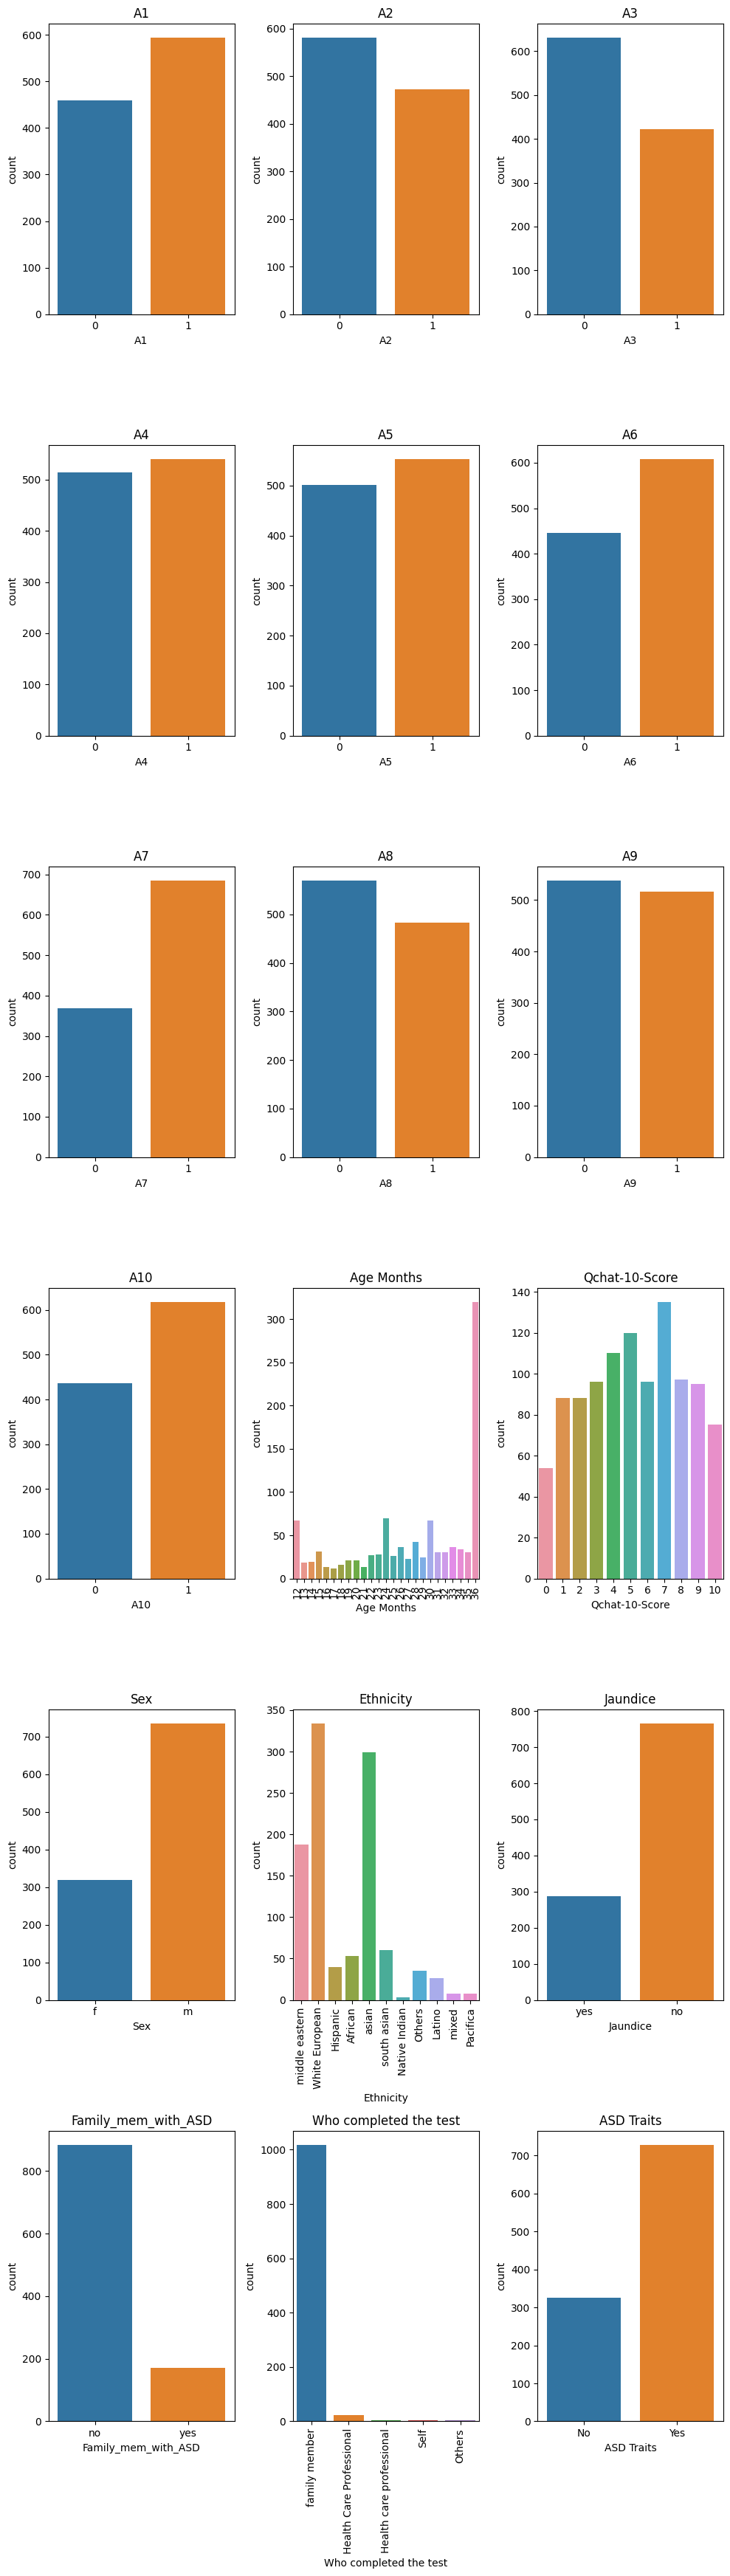

In [16]:
fig, axes = plt.subplots(6, 3, figsize = (10, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:,1:]):
    sns.countplot(x = data[col], ax = axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

This code generates a grid of subplots (6 rows and 3 columns) with a specified figure size. It then iterates over the columns (excluding the first one) in the DataFrame data and creates a countplot for each column, where the x-axis represents the unique values in that column and the y-axis represents the count of occurrences of each value. The title of each subplot is set to the name of the corresponding column in the DataFrame.
The main purpose of this plot is to show the individual counts of each feature in the dataset with respect to the Q chat. 

### DATA DISTRIBUTION ON AGE AND QCHAT 10 SCORE

In [17]:
data.iloc[:, 11:13].head(1)

,Age Months,Qchat-10-Score
0,28,3


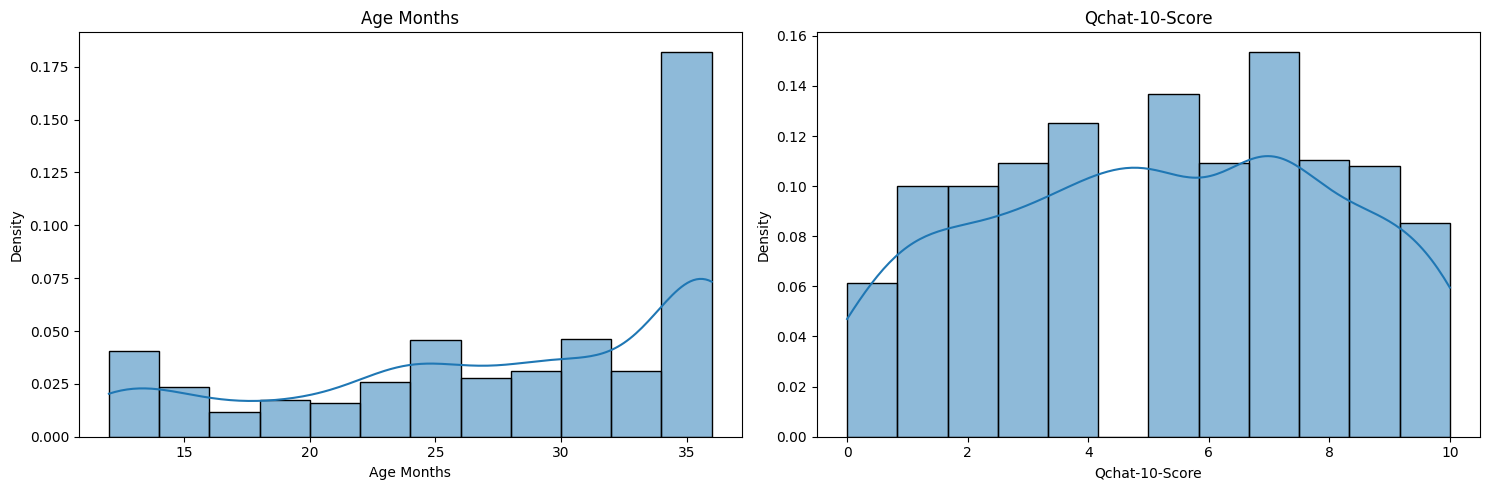

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 11:13]):
    sns.histplot(x = data[col], ax = axes[i], stat="density", kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

This code creates a horizontal grid with 1 row and 2 columns for subplots, with a specified figure size. It then iterates over the columns from index 11 to 12 (inclusive) in the DataFrame data and creates a histogram for each column.

The histogram represents the distribution of values in each column, with the x-axis denoting the values themselves and the y-axis representing the density (or frequency) of those values. Additionally, a kernel density estimate (KDE) curve is overlaid on the histogram to provide a smooth estimate of the probability density function of the data.

The title of each subplot is set to the name of the corresponding column in the DataFrame. After adjusting the layout to ensure proper spacing between subplots, the plots are displayed. This code aims to visualize the distributions of two specific columns in the dataset data.

## MULTIVARIATE ANALYSIS

### ETHNICITY DISTRIBUTION WITH ASD

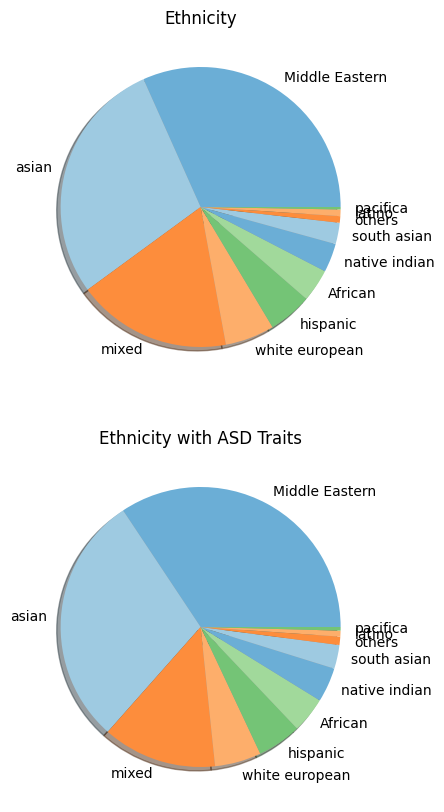

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
size = 0.5
eth_vals = data["Ethnicity"].value_counts()
labels_eth = ["Middle Eastern", "asian", "mixed", "white european", "hispanic", "African", "native indian", "south asian", "others", "latino", "pacifica"]

yes = data[data["ASD Traits"] == "Yes"]["Ethnicity"].value_counts()
no = data[data["ASD Traits"] == "No"]["Ethnicity"].value_counts()

asd_vals = data["ASD Traits"].value_counts()
labels_asd = ["No", "Yes"]
cmap = plt.colormaps["tab20c"]

outer_colors = cmap([1, 2, 5, 6, 9, 10])

ax[0].pie(eth_vals, radius=1, colors = outer_colors, labels = labels_eth, shadow = True)
ax[0].set_title("Ethnicity")

ax[1].pie(yes, radius=1, colors=outer_colors, labels = labels_eth,shadow=True)
ax[1].set_title("Ethnicity with ASD Traits")

plt.show()

This code creates a figure with two subplots arranged vertically, each with a size of 10x10. It then calculates the count of occurrences for each unique value in the "Ethnicity" column of the DataFrame data and stores them in the variable eth_vals.

It also specifies labels for the ethnicities and ASD traits, and defines colors for the pie charts.

In the first subplot (ax[0]), a pie chart is created representing the distribution of ethnicities in the dataset. Each slice of the pie corresponds to an ethnicity, with its size proportional to the count of occurrences.

In the second subplot (ax[1]), a pie chart is created representing the distribution of ethnicities among individuals with ASD traits. Each slice represents an ethnicity, and the size of the slice corresponds to the count of individuals with ASD traits belonging to that ethnicity.

Both pie charts have shadows for added depth and are labeled accordingly. This code aims to visualize the distribution of ethnicities overall and among individuals with ASD traits.

### Q-CHAT SCORE AND AGE WITH ASD

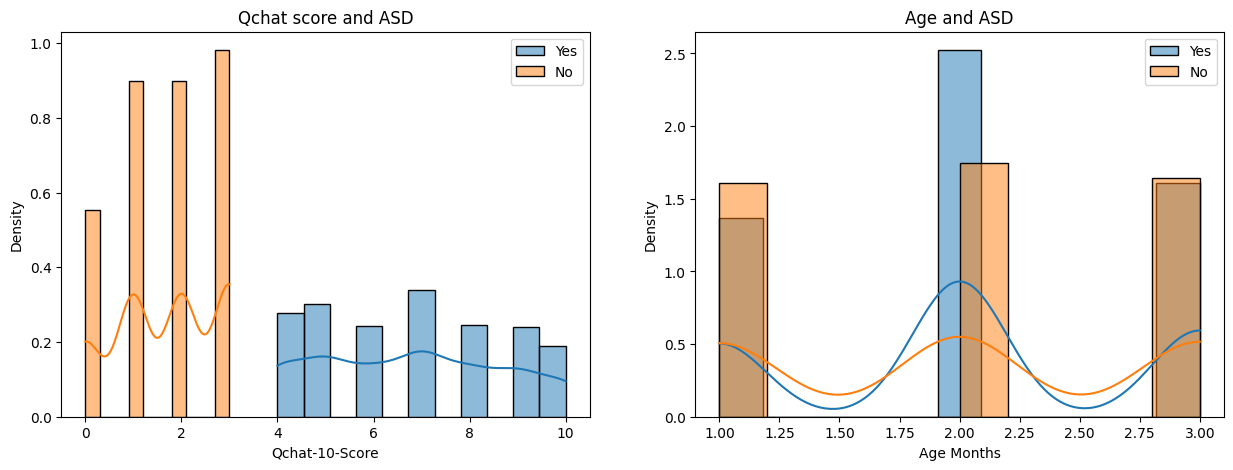

In [20]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))
sns.histplot(x = data[data["ASD Traits"] == "Yes"]["Qchat-10-Score"], label = "Yes", ax = axes[0], stat="density", kde = True)
sns.histplot(x = data[data["ASD Traits"] == "No"]["Qchat-10-Score"], label = "No", ax = axes[0], stat="density", kde = True)

axes[0].set_title("Qchat score and ASD")
axes[0].legend(loc = "upper right")

sns.histplot(x = (data[data["ASD Traits"] == "Yes"]["Age Months"]/12).astype(int), label = "Yes", ax = axes[1], stat="density", kde = True)
sns.histplot(x = (data[data["ASD Traits"] == "No"]["Age Months"]/12).astype(int), label = "No", ax = axes[1], stat="density", kde = True)

axes[1].set_title("Age and ASD")
axes[1].legend(loc = "upper right")
plt.show()

This code creates a figure with two subplots arranged horizontally, each with a size of 15x5.

In the first subplot (axes[0]), it plots the density histograms of the "Qchat-10-Score" column for individuals with ASD traits labeled as "Yes" and "No". The data is filtered based on the ASD trait status. KDE (Kernel Density Estimation) curves are overlaid on top of the histograms for a smooth representation of the data distribution. It sets the title as "Qchat score and ASD" and includes a legend indicating the labels "Yes" and "No" for ASD traits.

In the second subplot (axes[1]), it plots the density histograms of the age of individuals in months, converted to years, for individuals with ASD traits labeled as "Yes" and "No". Similarly, KDE curves are overlaid on top of the histograms. It sets the title as "Age and ASD" and includes a legend indicating the labels "Yes" and "No" for ASD traits.

This code aims to visually compare the frequency distributions of the "Qchat-10-Score" and the age of individuals between those with and without ASD traits. From the plot above we can see that the 2-4 chats have more frequency that the 4-10. ALso, there are more months in the year where the ASD risk is high.

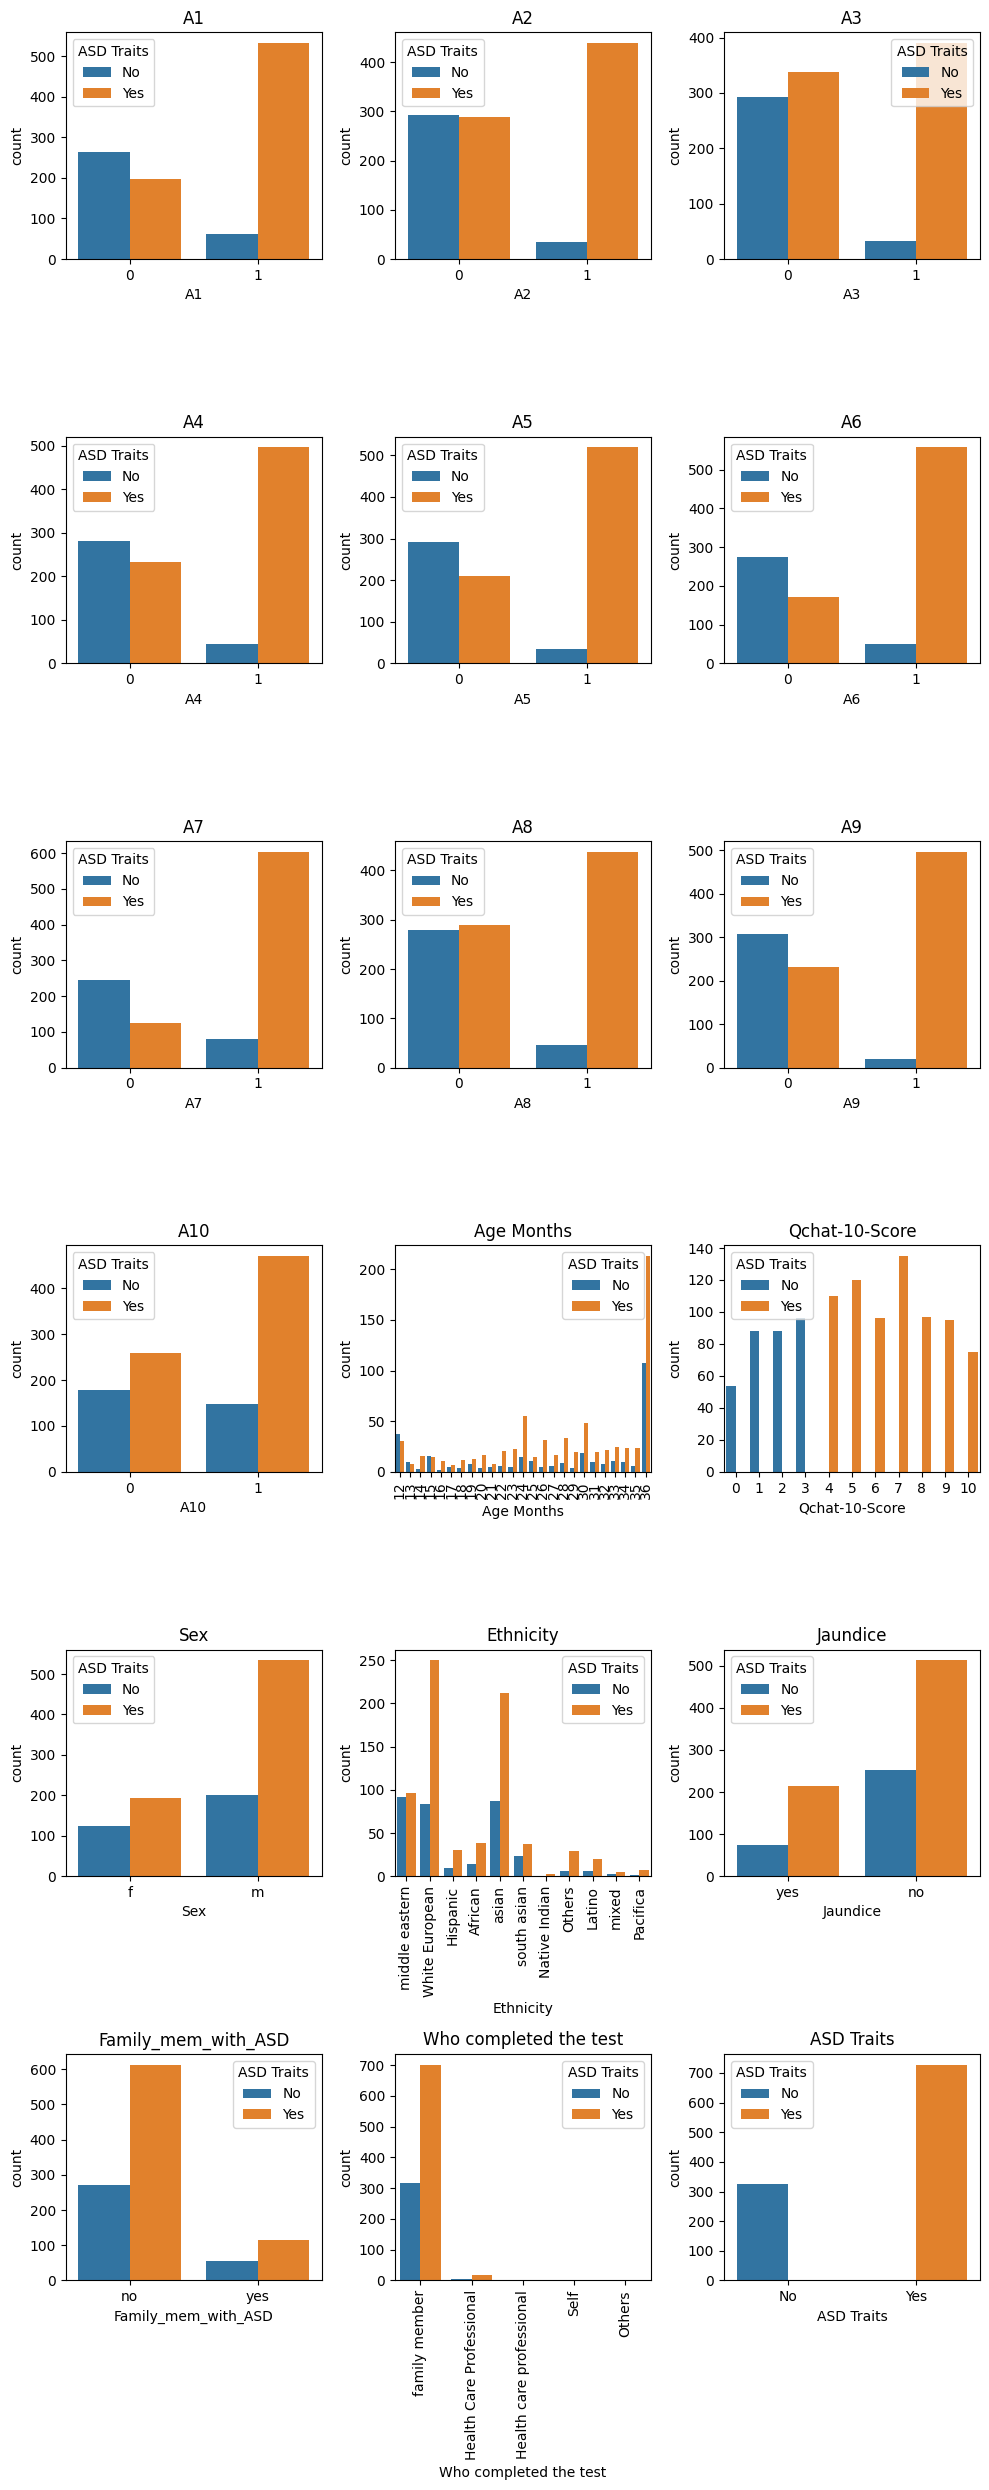

In [21]:
fig, axes = plt.subplots(6, 3, figsize = (10, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x = data[col], hue = data["ASD Traits"], ax = axes[i])
    axes[i].set_title(col)
    if col == "Ethnicity" or col == "Who completed the test" or col == "Age Months":
        # rotate the x-axis labels by 90 degress
        axes[i].tick_params(axis="x", labelrotation = 90)
plt.tight_layout()
plt.show()

This code generates a grid of subplots with 6 rows and 3 columns, with a specified figure size. It then iterates over the columns (excluding the first one) in the DataFrame data and creates a countplot for each column.

Each countplot visualizes the distribution of values in the current column, with the counts separated by the values of the column "ASD Traits". In other words, it shows the count of individuals with and without ASD traits for each category of the current column.

The title of each subplot is set to the name of the corresponding column in the DataFrame. Additionally, for specific columns ("Ethnicity", "Who completed the test", and "Age Months"), the x-axis labels are rotated by 90 degrees to prevent overlap.

The layout is adjusted to ensure proper spacing between subplots, and the plots are displayed. This code aims to visualize how the distribution of various categorical variables in the dataset data varies between individuals with and without ASD traits.







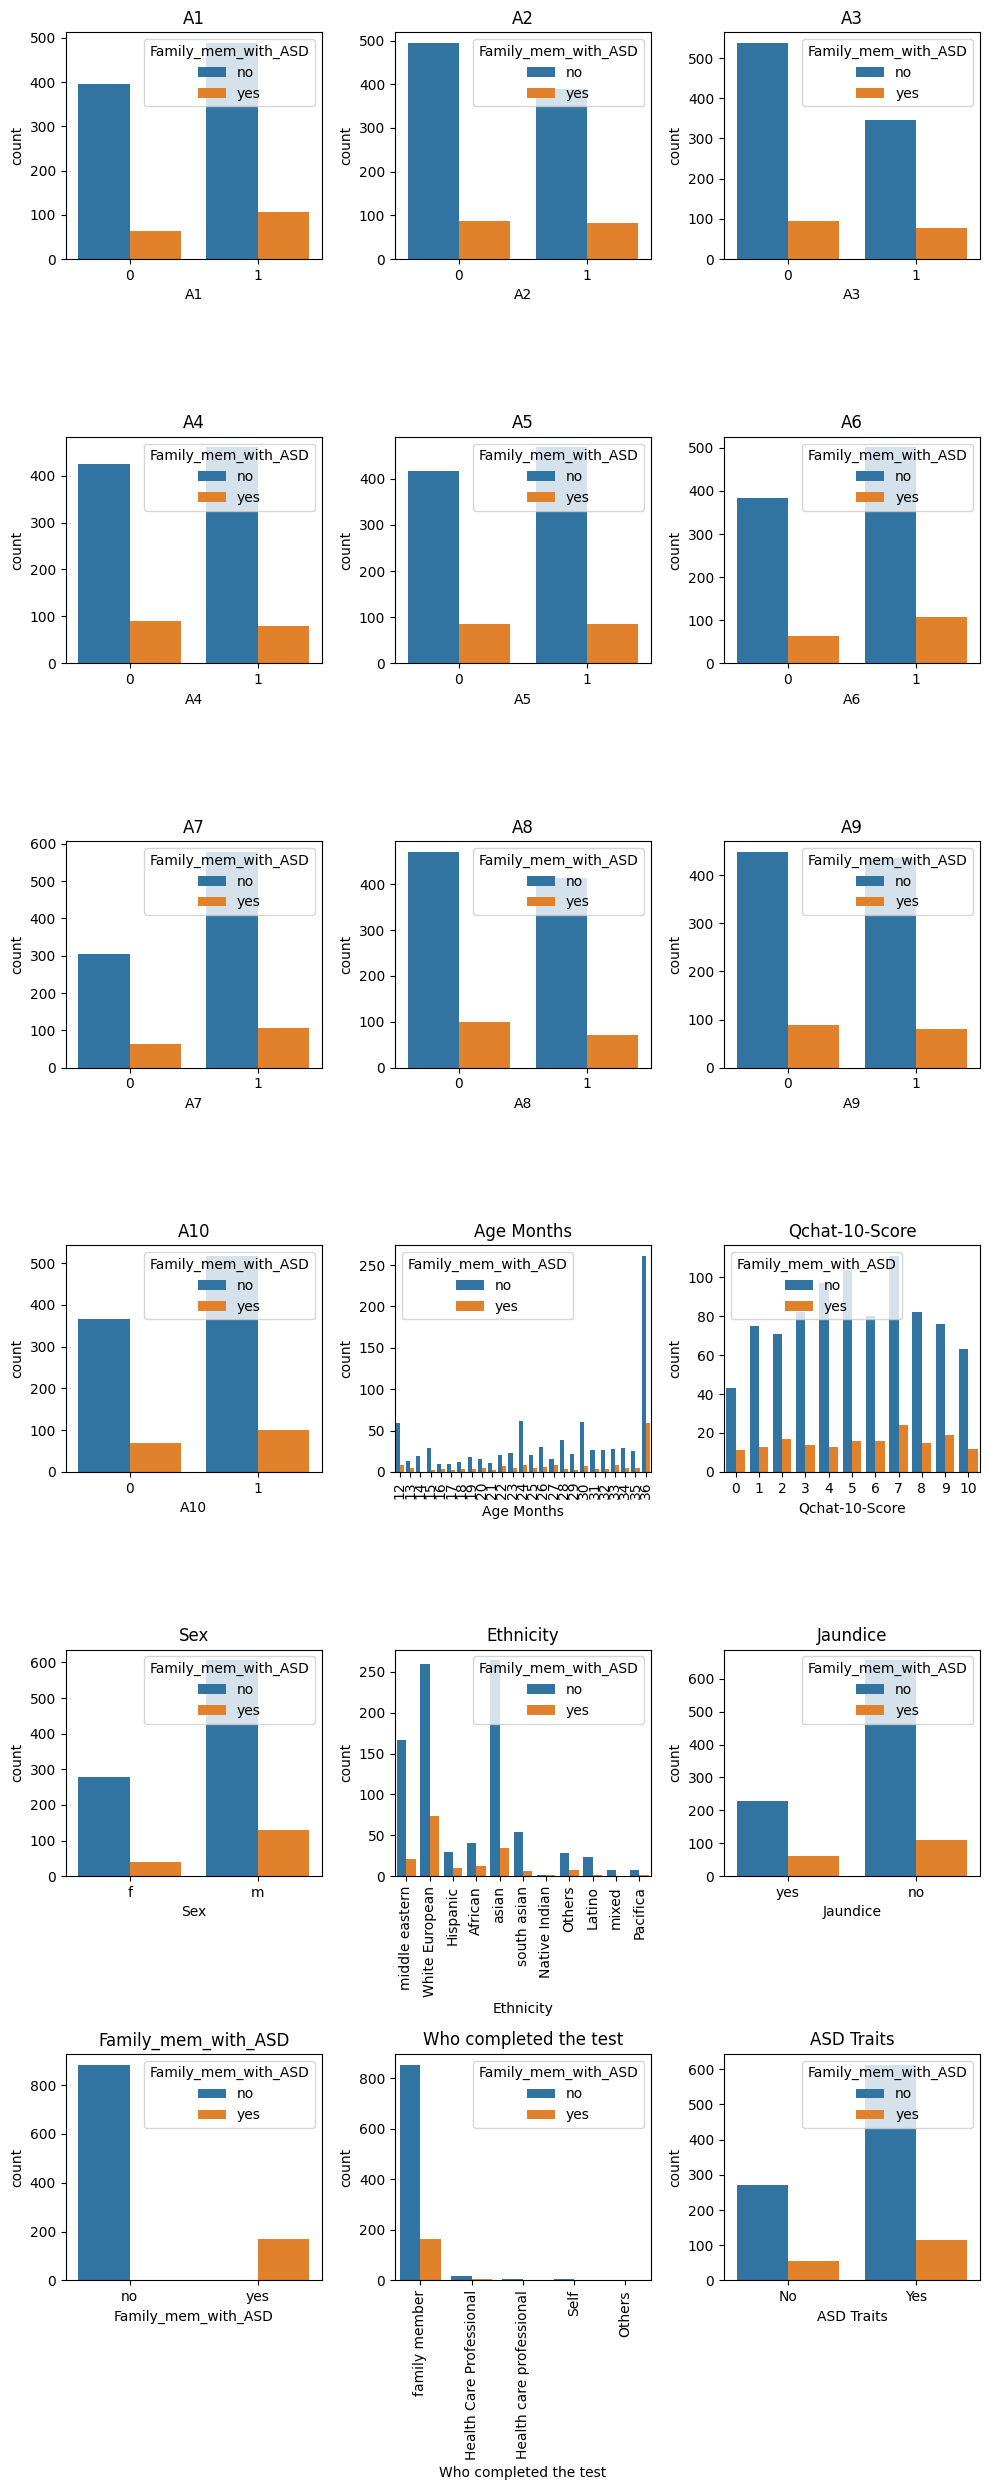

In [22]:
fig, axes = plt.subplots(6, 3, figsize = (10, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x = data[col], hue = data["Family_mem_with_ASD"], ax = axes[i])
    axes[i].set_title(col)
    if col == "Ethnicity" or col == "Who completed the test" or col == "Age Months":
        # rotate the x-axis labels by 90 degress
        axes[i].tick_params(axis="x", labelrotation = 90)
plt.tight_layout()
plt.show()

This code generates a grid of subplots with 6 rows and 3 columns, with a specified figure size. It then iterates over the columns (excluding the first one) in the DataFrame data and creates a countplot for each column.

Each countplot visualizes the distribution of values in the current column, with the counts separated by the values of the column "Family_mem_with_ASD". In other words, it shows the count of individuals based on whether they have a family member with ASD for each category of the current column.

The title of each subplot is set to the name of the corresponding column in the DataFrame. Additionally, for specific columns ("Ethnicity", "Who completed the test", and "Age Months"), the x-axis labels are rotated by 90 degrees to prevent overlap.

The layout is adjusted to ensure proper spacing between subplots, and the plots are displayed. This code aims to visualize how the distribution of various categorical variables in the dataset data varies based on whether individuals have a family member with ASD.

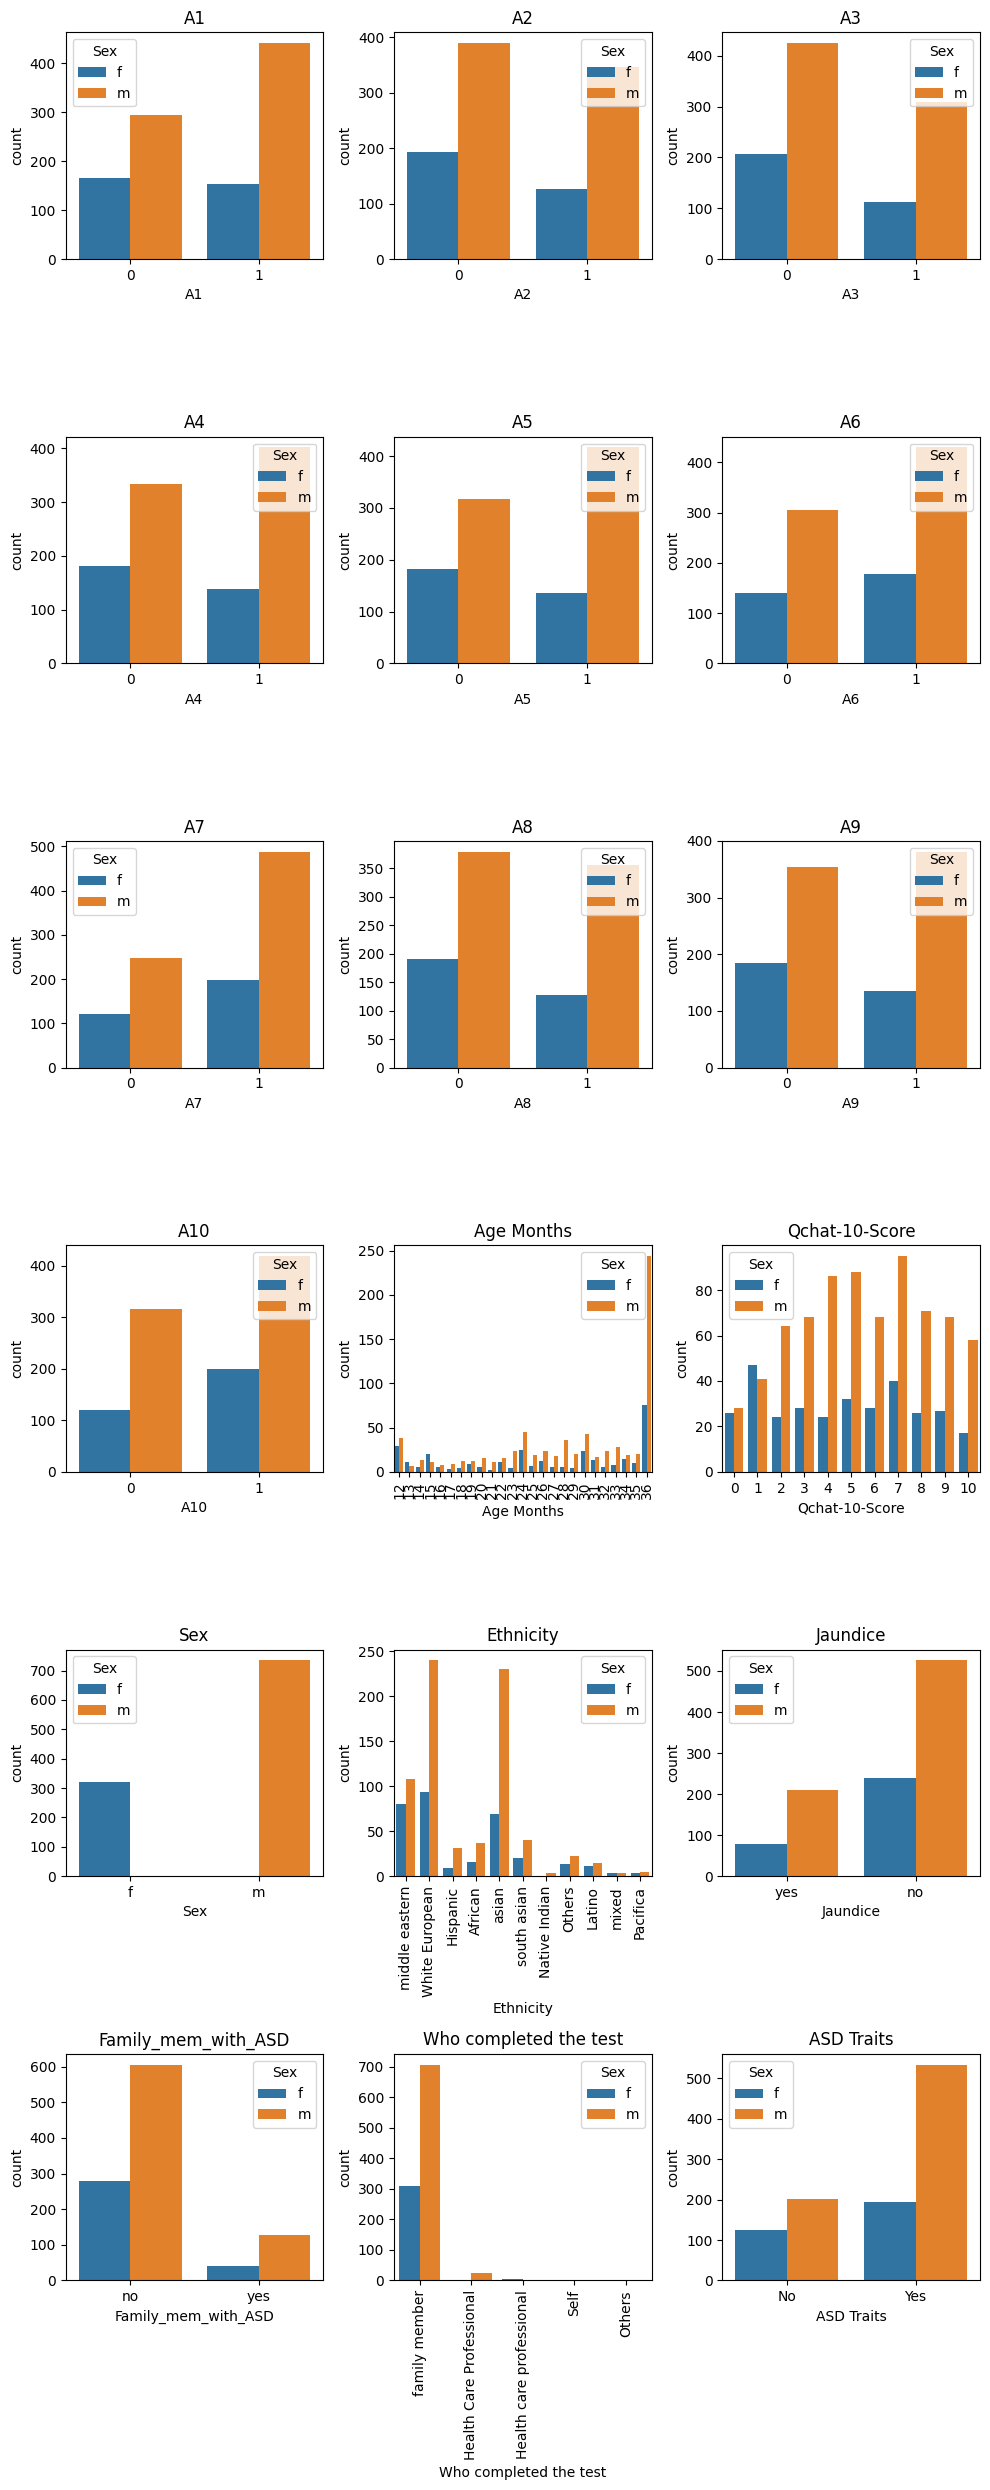

In [23]:
fig, axes = plt.subplots(6, 3, figsize = (10, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, 1:]):
    sns.countplot(x = data[col], hue = data["Sex"], ax = axes[i])
    axes[i].set_title(col)
    if col == "Ethnicity" or col == "Who completed the test" or col == "Age Months":
        # rotate the x-axis labels by 90 degress
        axes[i].tick_params(axis="x", labelrotation = 90)
plt.tight_layout()
plt.show()

This code generates a grid of subplots with 6 rows and 3 columns, with a specified figure size. It then iterates over the columns (excluding the first one) in the DataFrame data and creates a countplot for each column.

Each countplot visualizes the distribution of values in the current column, with the counts separated by the values of the column "Sex". In other words, it shows the count of individuals based on their sex for each category of the current column.

The title of each subplot is set to the name of the corresponding column in the DataFrame. Additionally, for specific columns ("Ethnicity", "Who completed the test", and "Age Months"), the x-axis labels are rotated by 90 degrees to prevent overlap.

The layout is adjusted to ensure proper spacing between subplots, and the plots are displayed. This code aims to visualize how the distribution of various categorical variables in the dataset data varies based on the sex of the individuals.

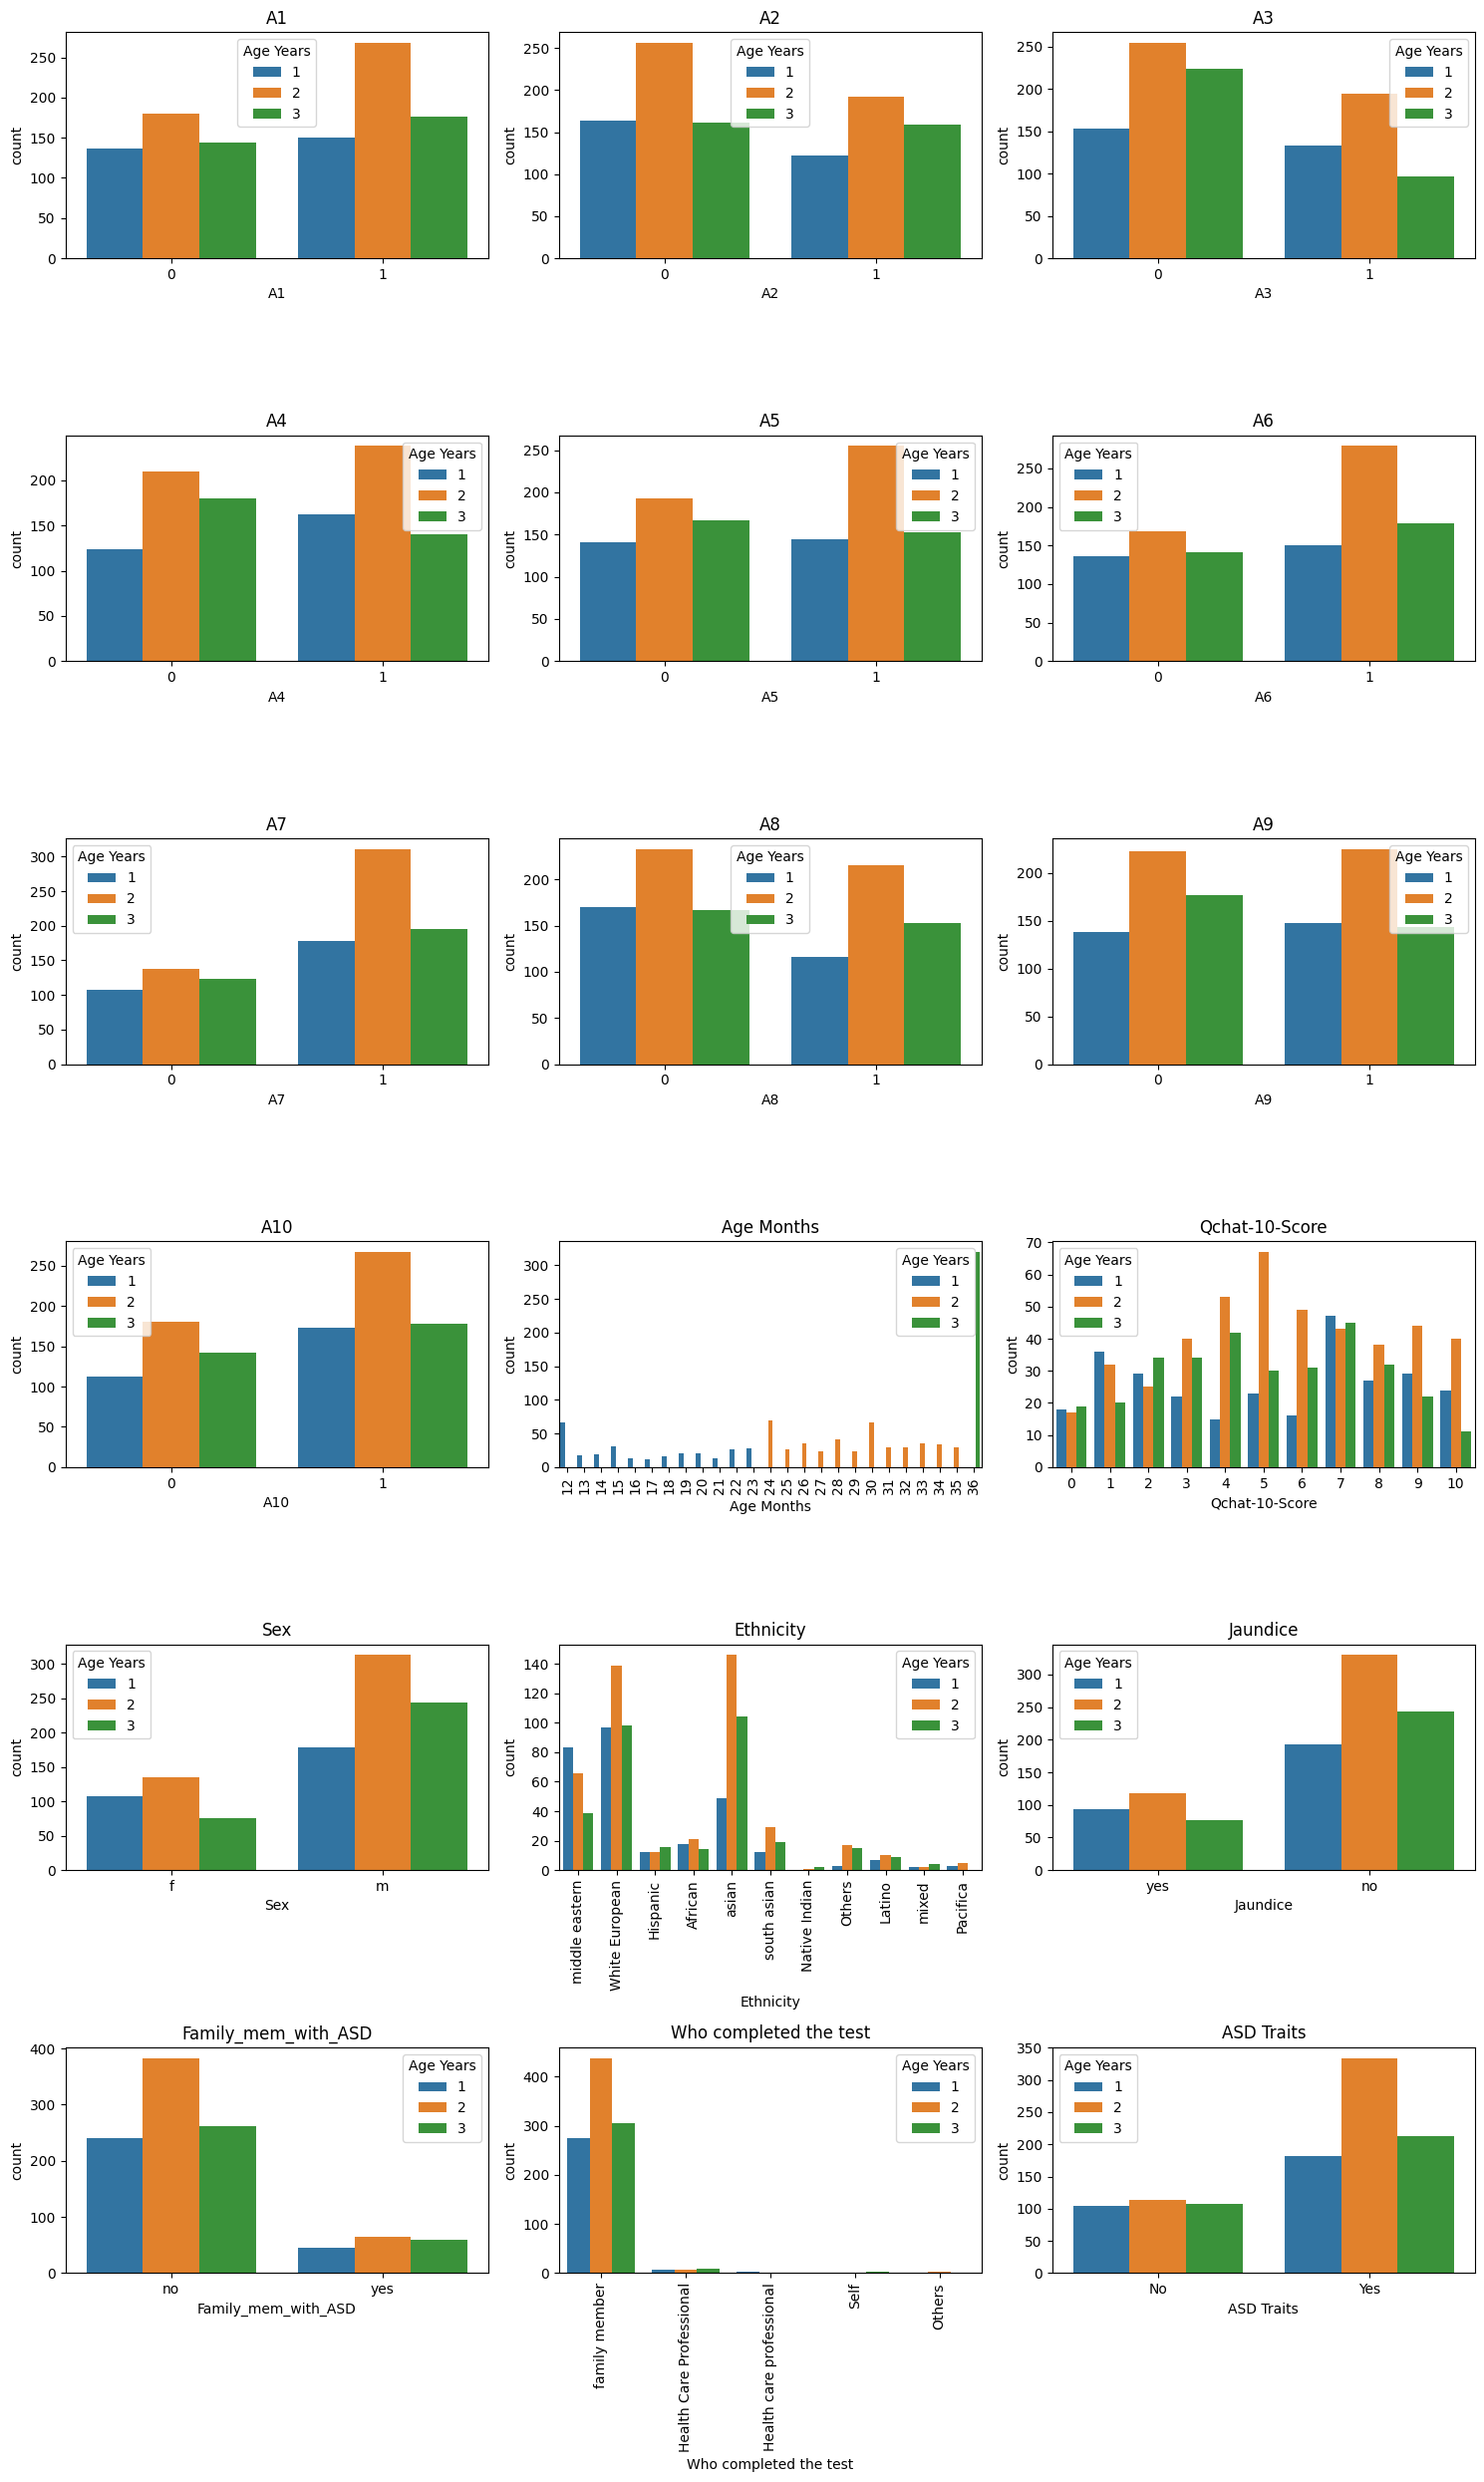

In [24]:
data["Age Years"] = (data["Age Months"] / 12).astype(int)

fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()

for i, col in enumerate(data.iloc[:,1:]):  # Adjust indexing if necessary
    if i < len(axes):
        sns.countplot(x=data[col], ax=axes[i], hue = data["Age Years"]) 
        axes[i].set_title(col)
        if col == "Ethnicity" or col == "Who completed the test" or col == "Age Months":
            # rotate the x-axis labels by 90 degress
            axes[i].tick_params(axis='x', labelrotation=90)
    else:
        break
plt.tight_layout()
plt.show()

In this code, a new column "Age Years" is created by dividing the existing "Age Months" column by 12 and converting the result to an integer. Then, the "Age Months" column is dropped from the DataFrame data.

Following this modification, a grid of subplots with 6 rows and 3 columns is created with a specified figure size. The code then iterates over the columns (excluding the first one) in the modified DataFrame data and creates a countplot for each column.

Each countplot visualizes the distribution of values in the current column, with the counts separated by the values of the "Age Years" column. This means it shows the count of individuals in each category of the current column, segmented by their age in years.

The title of each subplot is set to the name of the corresponding column in the DataFrame. Additionally, for specific columns ("Ethnicity", "Who completed the test", and "Age Months"), the x-axis labels are rotated by 90 degrees to prevent overlap.

## PREDICTIVE MODELLING(MACHINE LEARNING)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#### DATA PREPROCESSING

In [27]:
dataset = pd.read_csv("C:/Users/Hp/Documents/Toddler Autism dataset July 2018.csv")

In [28]:
dataset.head(2)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes


In this machine learning section, the target variable would be the Class/ASD Traits. We need to determine if a patient is prone to ASD or not. Preprocessing the data includes encoding the dataset as our model only needs numerical values as input.

#### LABEL ENCODER

This is a preprocessing technique used to transform non-numerical labels into numerial labels. This process is necessary in machine learning because most machibe learning algorithms require input data in numerical format rather than strings or objects. Basically, label encoding converts each value in a column to a number.

In [29]:
encoder = LabelEncoder()

In [30]:
dataset["Ethnicity"] = encoder.fit_transform(dataset["Ethnicity"])
dataset["Jaundice"] = encoder.fit_transform(dataset["Jaundice"])
dataset["Family_mem_with_ASD"] = encoder.fit_transform(dataset["Family_mem_with_ASD"])
dataset["Who completed the test"] = encoder.fit_transform(dataset["Who completed the test"])
dataset["Class/ASD Traits "] = encoder.fit_transform(dataset["Class/ASD Traits "])
dataset["Sex"] = encoder.fit_transform(dataset["Sex"])

Label encoder one-hot encodes the categorical variables to numerical variables 

In [31]:
# viewing the dataframe
dataset.head(2)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1


 ### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [32]:
# splits the data into dependent and independent variables
X = dataset.drop("Class/ASD Traits ", axis = 1) #independent columns
y = dataset["Class/ASD Traits "] #target

In [33]:
# splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

### FEATURE SELECTION

In any good training pipeline, a critical component is deciding which features will be used as inputs to the model. For many models, a small subset of input variables provide the lion share of predictive ability. It is important to lower the amount of input variables for some reasons such as:
- reducing multi collineariry
- reducing model training time and compute resources
- easy understanding of important points
- reduce dimenionality problems

In this modelling session, the feature selection method used will be the Principal Component Analysis (PCA) and it will be implemented using the sklearn decomposition library and embedded in the scaling and modeling Pipeline.

In [34]:
# determining the best number for number of components 
data_standard = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

In [35]:
data_standard.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,-1.730408,-1.136356,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,0.016652,-0.761384,-1.517918,1.018735,1.630865,-0.438529,0.179503,-1.494366
1,-1.727122,0.880006,1.108300,-0.818758,-1.024980,-1.050615,0.856477,0.733952,-0.921479,-0.979340,-1.190559,1.019590,-0.417259,0.658797,-0.411656,1.630865,-0.438529,0.179503,0.669180
2,-1.723835,0.880006,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,1.019590,-0.417259,0.658797,1.018735,1.630865,-0.438529,0.179503,0.669180
3,-1.720548,0.880006,1.108300,1.221362,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.484817,1.647488,0.658797,-2.795640,-0.613171,-0.438529,0.179503,0.669180
4,-1.717262,0.880006,1.108300,-0.818758,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,-0.986286,1.303364,-1.517918,-0.411656,-0.613171,2.280351,0.179503,0.669180


In [36]:
# initializes the principal component
pca = PCA()

In [37]:
pca.fit(data_standard)

PCA()

In [38]:
explained_variance = pca.explained_variance_ratio_

In [39]:
components = range(1, len(explained_variance) + 1)

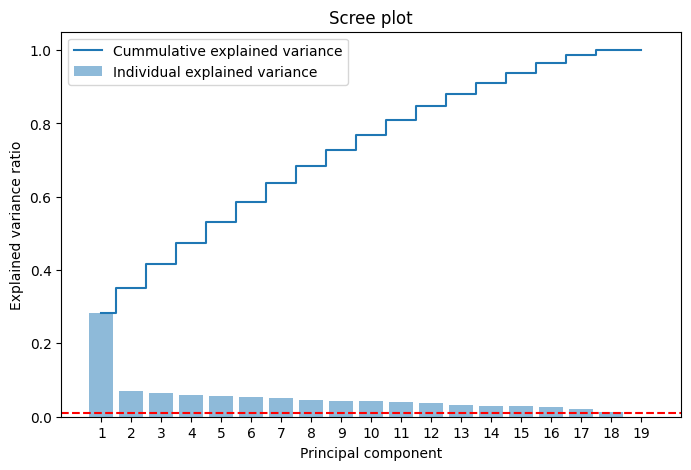

In [40]:
# plotting the scree
plt.figure(figsize=(8, 5))
plt.bar(components, explained_variance, alpha=0.5, align="center", label="Individual explained variance")
plt.step(components, np.cumsum(explained_variance), where="mid", label="Cummulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component")
plt.title("Scree plot")
plt.legend(loc="best")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.xticks(components)
plt.show()

The above scree plot is a graphical representation that is used to determine the number of retaining factors of a principal component. The above plot displays the eigenvalues of each factors in the principal component data. From the plot above, the elbow which is situated at the 2nd principal component gives the point where the eigenvalue levels off.

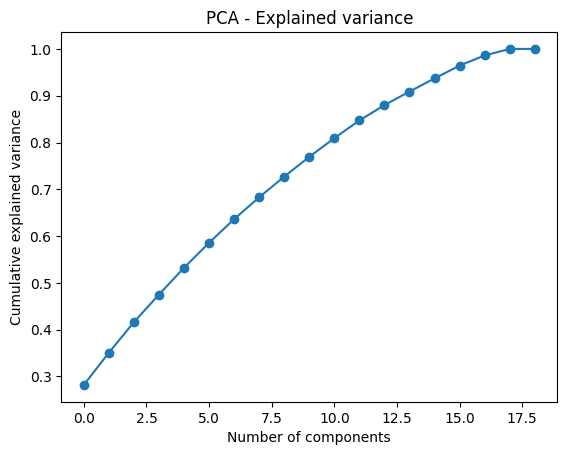

In [41]:
# ploting the cum variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance, marker = "o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA - Explained variance")
plt.show()

In the above plot, we need to fine the elbow point where adding more component doesnt significantly increase the explained variance which from the above plot, n_components = 1.

## CRONBACHS TEST

In [42]:
# implementation of the cronbach test
def cronbach_alpha(df):
    N = df.shape[1]
    variances = df.var(axis=0)
    total_var = variances.sum()
    cov_matrix = df.cov()
    avg_cov = cov_matrix.sum().sum() / (N * (N - 1))
    alpha = (N * avg_cov) / (total_var + (N - 1) * avg_cov)
    return alpha

In [43]:
result = cronbach_alpha(data_standard)

In [44]:
print(f"Cronbachs Alpha : {result}")

Cronbachs Alpha : 0.16664975479509367


## CRONBACH ALPHA USING PCA DERIVED ITEMS

In [45]:
# specifying the n_components
pca =  PCA(n_components = 2)
column_pca = pca.fit_transform(data_standard)

In [46]:
column_data = pd.DataFrame(column_pca, columns = ["pc1", "pc2"])
column_data

,pc1,pc2
0,2.552354,-0.091322
1,0.344532,1.848263
2,0.908016,1.550320
3,-3.542686,0.151477
4,-2.566029,0.387074
...,...,...
1049,3.634835,0.509593
1050,-0.497094,-2.866672
1051,-2.813172,-1.286401
1052,2.211535,1.351784


In [47]:
pca_result = cronbach_alpha(column_data)

In [48]:
print(f"Cronbachs Alpha : {pca_result}")

Cronbachs Alpha : 0.666666666666667


# RANDOM FOREST CLASSIFIER

In [49]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=1)),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=46, max_depth=10))
])

In [50]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=46))])

In [51]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [52]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.68%


In [53]:
# make predictions
y_pred = pipeline.predict(X_test)

In [54]:
predictions = pd.DataFrame({"Predictions" : y_pred})

In [55]:
predictions.to_csv("Pred_data1.csv")

In [56]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.96      0.99      0.98       149

    accuracy                           0.97       211
   macro avg       0.97      0.95      0.96       211
weighted avg       0.97      0.97      0.97       211



In [57]:
class_labels = ["Yes", "No"]

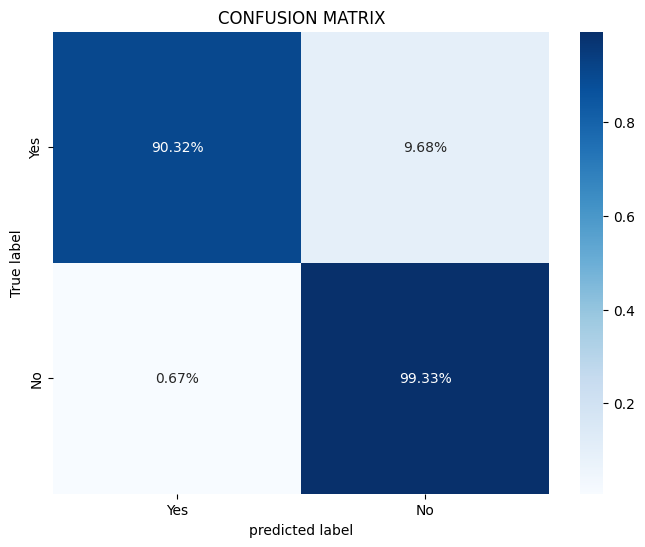

In [58]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

A confusion matrix is a performance measurement tool used for evaluating the strenght of a machine learning model. It is usually divided into four quadrants where the first quadrant is the True positive (TP), the second quadrant is the False Positive (FP), the third quadrant is the False Negative (FN) and the fourth, the True Negative (TN).

- From the above matrix, the true positive is 90.32% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 0.67%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 9.68% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 99.33% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

# LOGISTIC REGRESSION

In [59]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=1)),
    ("classifier", LogisticRegression(random_state=46))
])

In [60]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('classifier', LogisticRegression(random_state=46))])

In [61]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [62]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.05%


In [63]:
# make predictions
y_pred = pipeline.predict(X_test)

In [64]:
predictions = pd.DataFrame({"Predictions" : y_pred})

In [65]:
predictions.to_csv("Pred_data2.csv")

In [66]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.99      0.99      0.99       149

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211



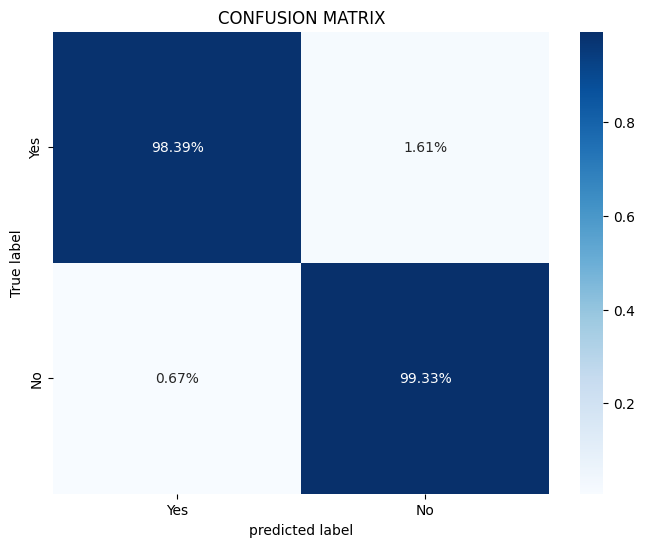

In [67]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

- From the above matrix, the true positive is 98.39% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 0.67%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 1.61% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 99.33% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

### VIEWING THE PREDICTIONS

In [68]:
pred1 = pd.read_csv("Pred_data1.csv")

In [69]:
pred1.head()

,Unnamed: 0,Predictions
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [70]:
pred2 = pd.read_csv("Pred_data2.csv")

In [71]:
pred2.head()

,Unnamed: 0,Predictions
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


# XGBOOST CLASSIFIER

In [72]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=1)),
    ("xgb", XGBClassifier())
])

In [73]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [74]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [75]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.58%


In [76]:
# make predictions
y_pred = pipeline.predict(X_test)

In [77]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.99      0.99      0.99       149

    accuracy                           0.99       211
   macro avg       0.98      0.99      0.98       211
weighted avg       0.99      0.99      0.99       211



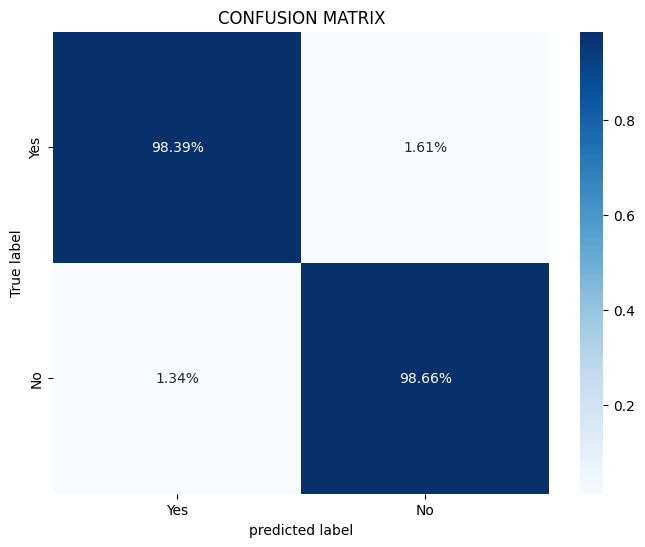

In [78]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

- From the above matrix, the true positive is 98.39% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 1.34%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 1.61% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 98.66% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.